In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import collections

df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [3]:
# No Null Fatality Value
df2 = df[df["Fatalities"].notna()]

# No Null Type Value
df2 = df2[df["Type"].notna()]


C:\Users\justin\AppData\Local\Temp\ipykernel_21836\1614176023.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df["Type"].notna()]


In [4]:
dates = df2["Date"]

arr_dates = list(dates)

years = []

for date in arr_dates:
    temp = date.split("/")
    year = temp[2]
    years.append(int(year))

years = np.array(years)

In [5]:
 # Rounds years to the nearest Year_Div, 10 means rounds off to the nearest decade
year_div = 10
years = years//year_div * year_div

dec_group_vals = {}

iter = 0
for dec_group in years:
    if dec_group not in list(dec_group_vals.keys()):
        dec_group_vals[dec_group] = []
    
    dec_group_vals[dec_group].append(df2.iloc[iter].Fatalities)
    iter += 1

dec_group_vals

{1900: [1.0],
 1910: [5.0,
  1.0,
  14.0,
  30.0,
  21.0,
  19.0,
  20.0,
  22.0,
  19.0,
  27.0,
  20.0,
  20.0,
  23.0,
  21.0,
  24.0,
  18.0,
  18.0,
  23.0,
  22.0,
  19.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 1920: [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  1.0,
  2.0,
  2.0,
  1.0,
  1.0,
  4.0,
  1.0,
  1.0,
  3.0,
  2.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  46.0,
  5.0,
  3.0,
  5.0,
  34.0,
  7.0,
  3.0,
  1.0,
  3.0,
  3.0,
  1.0,
  4.0,
  2.0,
  1.0,
  3.0,
  1.0,
  1.0,
  1.0,
  6.0,
  2.0,
  1.0,
  6.0,
  2.0,
  1.0,
  52.0,
  1.0,
  1.0,
  3.0,
  3.0,
  1.0,
  1.0,
  8.0,
  5.0,
  4.0,
  2.0,
  4.0,
  2.0,
  1.0,
  1.0,
  14.0,
  2.0,
  1.0,
  1.0,
  1.0,
  7.0,
  2.0,
  4.0,
  4.0,
  2.0,
  4.0,
  0.0,
  3.0,
  1.0,
  2.0,
  1.0,
  3.0,
  1.0,
  2.0,
  1.0,
  5.0,
  1.0,
  1.0,
  7.0,
  2.0,
  6.0,
  2.0,
  4.0,
  1.0,
  6.0,
  1.0,
  2.0,
  1.0,
  4.0,
  3.0,
  2.0,
  2.0,
  1.0,
  1.0,
  1.0,
  2.0,
  1.0,
  9.0,
  1.0,
  2.0,
  3.0,

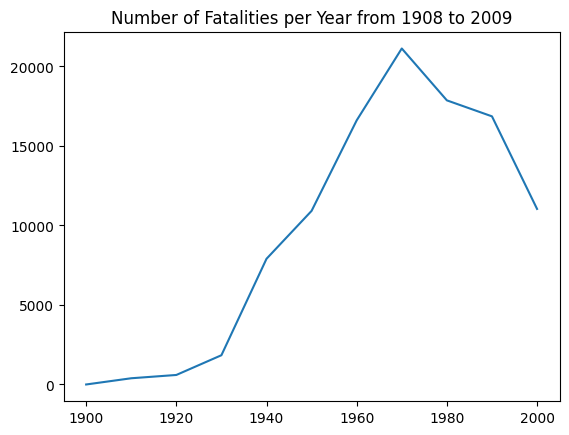

In [6]:
dec_group_sums = {}

for x in list(dec_group_vals.keys()):
    if x not in list(dec_group_sums.keys()):
        dec_group_sums[x] = 0
    
    dec_group_sums[x] = sum(dec_group_vals[x])

dec_group_sums = collections.OrderedDict(sorted(dec_group_sums.items()))

myList = dec_group_sums.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.plot(x, y)
plt.title("Number of Fatalities per Year from 1908 to 2009")
plt.show()